In [1]:
from bcd.utils import full_train_test

In [3]:
N_TRAIN_SAMPLES = 3000
N_VALI_SAMPLES = 1000
N_ITER = 5
N_EPOCHS = 50

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5


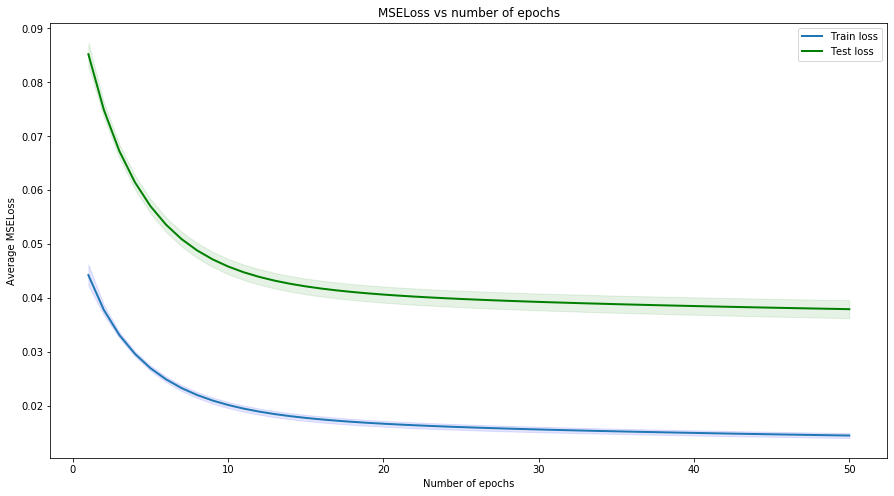

Test accuracy mean = 0.8491333333333333


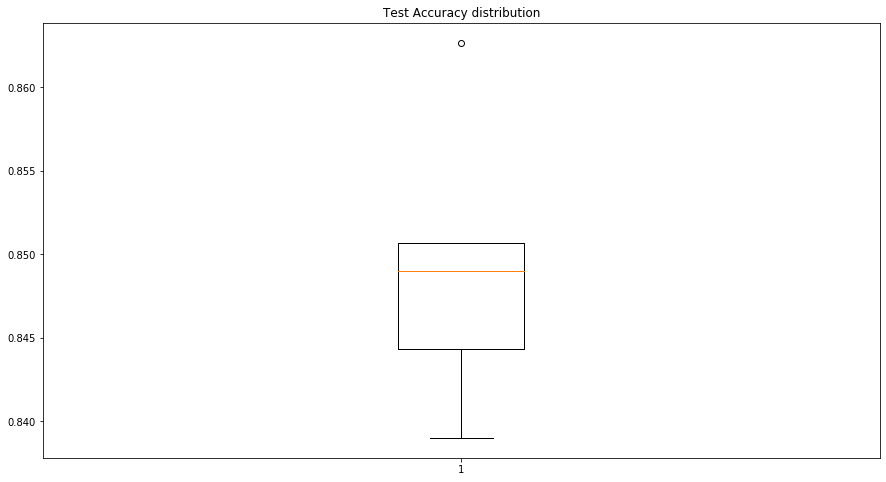

Accuracy: 0.849 +/- 0.008
Iteration time:  17.778 +/- 0.232 seconds


In [4]:
full_train_test(N_TRAIN_SAMPLES, N_VALI_SAMPLES, N_ITER, N_EPOCHS)